In [4]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# File to import
soccer_data_to_load = "resources/transfermarkt_fbref_201718.csv"

In [6]:
# Read file and store into pandas dataframes
soccer_data = pd.read_csv(soccer_data_to_load, sep=";")


In [7]:
# Display data
soccer_data.shape[0]


2232

In [8]:
soccer_data.head()


,Unnamed: 0,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
0,379,Burgui,es ESP,"FW,MF",Alavés,23,1993,1800000,186,attack - Left Winger,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
1,2530,Raphaël Varane,fr FRA,DF,Real Madrid,24,1993,70000000,191,Defender - Centre-Back,...,2.00,83.3,45.4,37.9,1.00,66161,1,1,0,201718#
2,721,Rubén Duarte,es ESP,DF,Alavés,21,1995,2000000,179,Defender - Left-Back,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
3,2512,Samuel Umtiti,fr FRA,DF,Barcelona,23,1993,60000000,182,Defender - Centre-Back,...,2.45,78.3,41.1,37.2,0.98,66603,1,0,0,201718#
4,882,Manu García,es ESP,MF,Alavés,31,1986,1800000,183,midfield - Defensive Midfield,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#


In [9]:
# Count the total number of players
total_players = len(soccer_data['player'].unique())
print(f'number of players in the analysis is: {total_players}')

number of players in the analysis is: 2118


Fix the code below
# Count number of duplicate players

In [22]:
# Count number of duplicate players
duplicate_total_players = soccer_data[soccer_data.duplicated(["player"],keep="first")].unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [11]:
# Determine which nationality has the most players included in the analysis
nationality_count = soccer_data.groupby(['nationality']).count()['player']
nationality_count = nationality_count.sort_values(ascending=False)
nationality_count




nationality
es ESP     325
fr FRA     281
it ITA     265
de GER     199
eng ENG    176
          ... 
mr MTN       1
ee EST       1
is ISL       1
mz MOZ       1
0            1
Name: player, Length: 99, dtype: int64

In [12]:
# Determine which nationality has the most players included in the analysis
top_20=nationality_count[:20]
top_20

nationality
es ESP     325
fr FRA     281
it ITA     265
de GER     199
eng ENG    176
br BRA      97
ar ARG      91
be BEL      47
nl NED      47
pt POR      41
sn SEN      39
ch SUI      34
uy URU      30
at AUT      24
dk DEN      24
ci CIV      24
dz ALG      23
co COL      22
ma MAR      22
se SWE      20
Name: player, dtype: int64

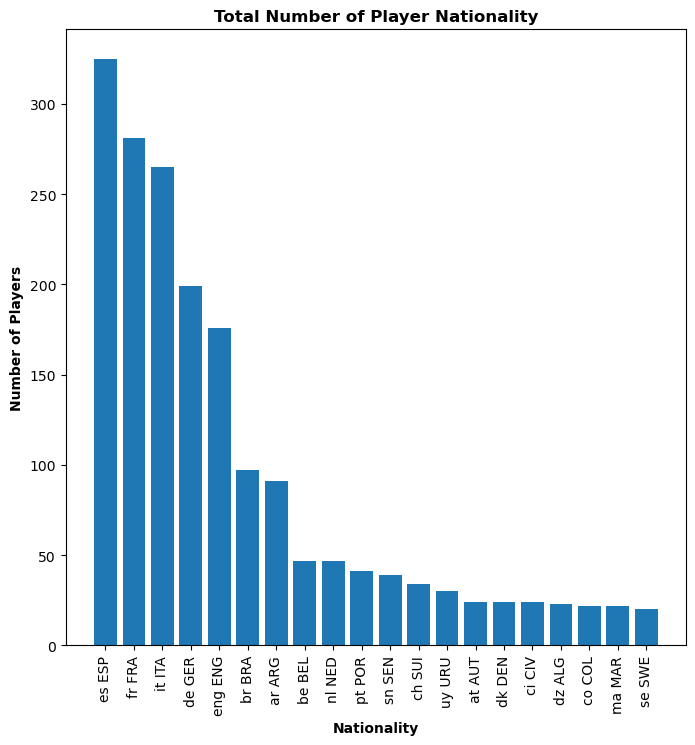

In [21]:
fig=plt.figure(figsize=(8,8))
plt.bar(top_20.index,top_20.values)
plt.xticks(rotation=90)
plt.title(label='Total Number of Player Nationality', fontweight = 'bold')
plt.xlabel('Nationality', fontweight = 'bold')
plt.ylabel('Number of Players', fontweight = 'bold')
plt.show()


In [14]:
# Determine which nationality has the most players included in the analysis
nationality = soccer_data.groupby(['nationality']).sum(numeric_only=True)['Unnamed: 0']
nationality

nationality
0           2686
GPE          780
GYF         2200
al ALB      8502
am ARM      3365
           ...  
uy URU     36249
ve VEN     15802
wal WAL    21677
xk KVX      3089
za RSA      5097
Name: Unnamed: 0, Length: 99, dtype: int64

In [15]:
# Determine which nationality has the most players included in the analysis
nationality = soccer_data.groupby('nationality')
nationality.head()


,Unnamed: 0,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
0,379,Burgui,es ESP,"FW,MF",Alavés,23,1993,1800000,186,attack - Left Winger,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
1,2530,Raphaël Varane,fr FRA,DF,Real Madrid,24,1993,70000000,191,Defender - Centre-Back,...,2.00,83.3,45.4,37.9,1.00,66161,1,1,0,201718#
2,721,Rubén Duarte,es ESP,DF,Alavés,21,1995,2000000,179,Defender - Left-Back,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
3,2512,Samuel Umtiti,fr FRA,DF,Barcelona,23,1993,60000000,182,Defender - Centre-Back,...,2.45,78.3,41.1,37.2,0.98,66603,1,0,0,201718#
4,882,Manu García,es ESP,MF,Alavés,31,1986,1800000,183,midfield - Defensive Midfield,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152,898,Theodor Gebre Selassie,cz CZE,"DF,MF",Werder Bremen,30,1986,2500000,181,Defender - Right-Back,...,1.24,40.0,48.5,-8.5,-0.25,38726,0,0,0,201718#
2159,1707,Jérémy Morel,mg MAD,DF,Lyon,33,1984,25000,172,Defender - Centre-Back,...,2.05,66.9,39.7,27.2,0.72,46005,0,0,0,201718#
2160,2060,Milot Rashica,xk KVX,"FW,MF",Werder Bremen,21,1996,7000000,177,attack - Left Winger,...,1.24,40.0,48.5,-8.5,-0.25,38726,0,0,0,201718#
2203,2544,Olivier Verdon,bj BEN,DF,Bordeaux,21,1995,15000,190,Defender - Centre-Back,...,1.45,52.6,40.7,11.9,0.31,26470,0,0,0,201718#


In [16]:
# Determine which position plays the most minutes
position_minutes = soccer_data.groupby(["position"])["minutes"].sum()
position_minutes=position_minutes.sort_values(ascending=False)
position_minutes 

position
DF       984331
MF       591090
FW       326750
FW,MF    322182
MF,FW    301127
GK       265953
DF,MF    162296
MF,DF     63246
DF,FW     18118
FW,DF     10480
GK,MF       121
0             1
Name: minutes, dtype: int64

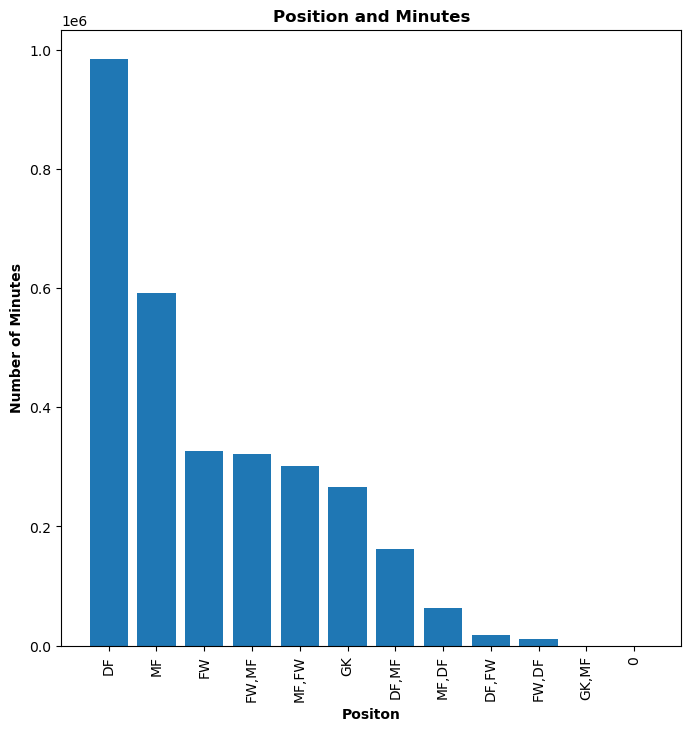

In [20]:

fig=plt.figure(figsize=(8,8))
plt.bar(position_minutes.index,position_minutes.values)
plt.xticks(rotation=90)
plt.title(label='Position and Minutes', fontweight = 'bold')
plt.xlabel('Positon', fontweight = 'bold')
plt.ylabel('Number of Minutes', fontweight = 'bold')
plt.show()

In [84]:
# Determine which age has the highest value
age_value = soccer_data.groupby(["age"])["value"].sum()
age_value=age_value.sort_values(ascending=False)
age_value

age
26    2497790000
25    2435640000
23    2254495000
24    2227905000
28    1739285000
21    1555360000
22    1521615000
27    1429055000
30    1335930000
20    1324375000
29    1101710000
18     565757500
19     483572500
31     459215000
32     263755000
33      68420000
17      66207500
34      41895000
16      23095000
36       9390000
15       6000000
39       2020000
35       1450000
37       1070000
38        205000
40         25000
0           5000
Name: value, dtype: int64

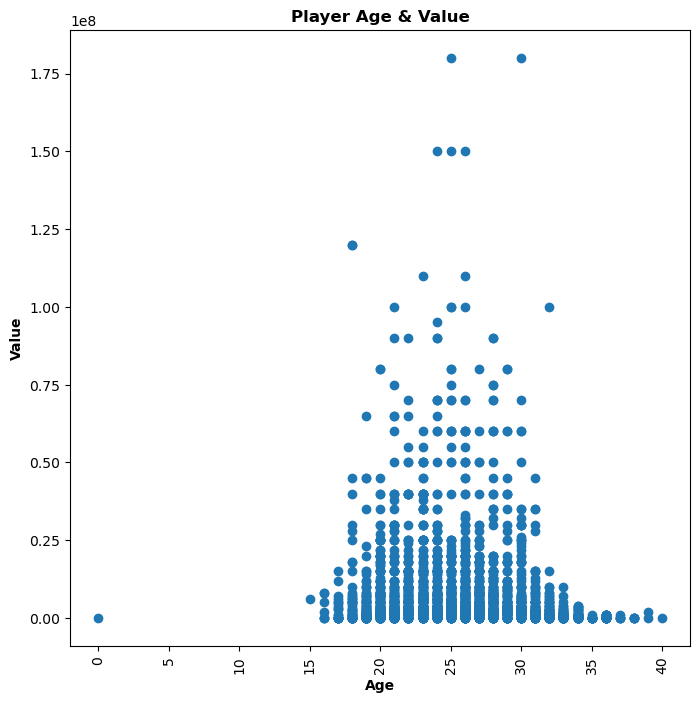

In [19]:
fig=plt.figure(figsize=(8,8))
plt.scatter(soccer_data["age"], soccer_data["value"])
plt.xticks(rotation=90)
plt.title(label='Player Age & Value', fontweight = 'bold')
plt.xlabel('Age', fontweight = 'bold')
plt.ylabel('Value', fontweight = 'bold')
plt.show()

In [ ]:
# Determine which position has the most red cards


In [ ]:
# Determine which league has the most valuable players


In [78]:
# Determine the average player age
average_age = soccer_data['age'].mean()
average_age

25.416666666666668

In [ ]:
# Determine which position has the tallest players

In [ ]:
# How does the league in which the player plays affect their value, goals scored, and minutes played?

In [ ]:
# How does the number of tackles and tackles won relate to the player's position?

In [ ]:
# What is the correlation between xG and actual goals scored for the players in the squad?

In [ ]:
# What is the distribution of goals per 90 minutes among players in different positions?